In [1]:
%pylab inline
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Choose the number of clusters
k=21

(3000, 3000, 3)

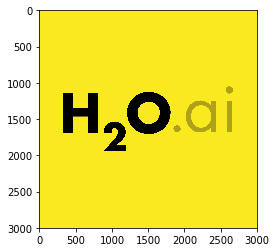

In [3]:
# Read the image from disk and transform into an array
logo = Image.open("../kmeans_data/h2o-logo.jpg")
data = array(logo)

imshow(data)
data.shape

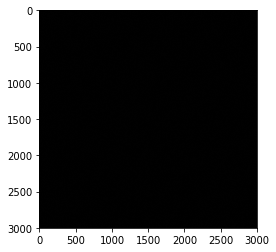

In [4]:
N = int(data.shape[0]*data.shape[1]/2)
seed(777)
space = concatenate((randint(0, data.shape[0], N)[:, newaxis], randint(0, data.shape[1], N)[:, newaxis]), axis=1)

uspace = zeros_like(data)
uspace[space[:, 0], space[:, 1]] = 1

imshow(uspace)

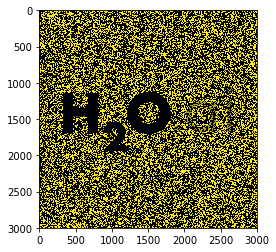

In [5]:
dots = data * uspace

imshow(dots)

In [6]:
dataset = vstack(nonzero(dots)).T

dataset = dataset[::1]    
np.isfortran(dataset)
print(type (dataset))
print(dataset.shape)

rows=np.shape(dataset)[0]
print("rows=%d" % (rows))
labels = np.random.randint(rows, size=rows) % k

dataset = dataset.astype(float32)
labels = labels.astype(float32)

<class 'numpy.ndarray'>
(10116514, 3)
rows=10116514


In [7]:
# Fit an H2O4GPU KMeans model for 21 clusters on a single GPU with 1000 iterations.
import h2o4gpu

model = h2o4gpu.KMeans(n_clusters=k, tol=1e-7)
%time model.fit(dataset, labels)
asses = model.predict(dataset)
cents = model.cluster_centers_

CPU times: user 22.6 s, sys: 4.64 s, total: 27.2 s
Wall time: 27.2 s


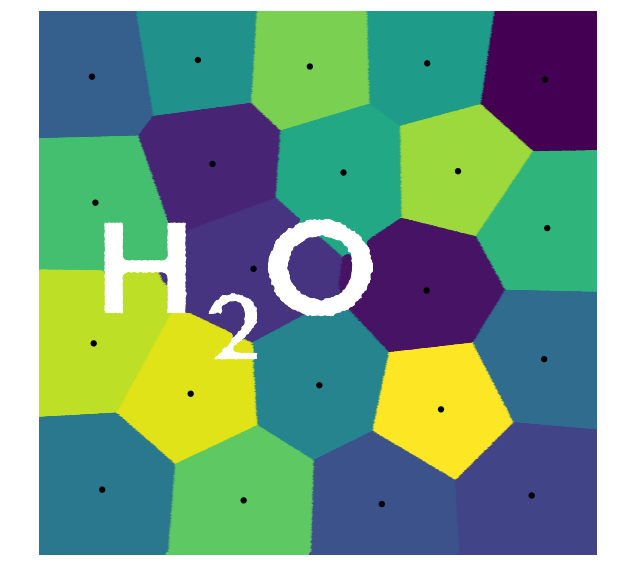

In [8]:
# Plot the final clustering
np.ndarray.flatten(asses)
step=13
rcParams["figure.figsize"] = (10, 10)
scatter(dataset[::step, 1], dots.shape[0] - dataset[::step, 0], c=asses[::step], edgecolors="none")
scatter(cents[:, 1], dots.shape[0] - cents[:, 0], c="black", s=40, edgecolors="none")
xlim((0, dots.shape[1]))
ylim((0, dots.shape[0]))
axis("off")
savefig("sourced.png", transparent=True, bbox_inches=0, pad_inches=0)